In [3]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
def getExcel(folders):
    excelfile = os.path.join(folders['main'],folders['excel'])
    info = pd.read_excel(f"{excelfile}", convert_float=True)
    info.columns = map(str.lower, info.columns)
    return(info)                     

In [5]:
folders = {}
folders['main'] = '/mnt/c/Users/felix/OneDrive/WORK/2019ETH/Analysis'   
folders['excel'] = r'Roi whole WM GM for C6_T6 clean up.xlsx'

df = getExcel(folders)

In [6]:
# cleanup

df[df['rat id']==""] = np.NaN
df = df.fillna(method='ffill')   # fill empty rows that belong to same rat

split = df['rat id'].str.split("_", n=2, expand=True)
del df['rat id']
df['group'] = split[0]
df['date'] = split[1]
df['id'] = split[2]

split = df['acquisition/scan'].str.split(" ", expand=True)
del df['acquisition/scan']
df['acquisition'] = split[0]
df['scan'] = split[1]

df['group'].replace(regex=True,inplace=True,to_replace='.* ',value=r'')  # gives sham/sev/mod group (without the meanignless number)
df.columns = [c.replace(' ', '_') for c in df.columns]  # prevent later errors due to spaces
df = df.rename(columns={'unnamed:_18': 'comments'})  #rename those with weird names

df
# df['group'].str.split(" ", expand=True)
# data['result'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
# x = df['rat id'].str.split("_", n=2, expand=True)

,location_estimate,slice_number,cs_horizontal_mm,cs_vertical,area_cm2_gm,area_pu_gm,rm_gm,sd_gm,minimum_gm,maximum_gm,...,rm_wm,sd_wm,minimum_wm,maximum_wm,comments,group,date,id,acquisition,scan
0,T6,12.0,2.84,2.68,0.02,269.0,1650.0,138.00,1450.0,2560.0,...,1690.0,274.0,0.0,4650.0,NaN,sev,20181218,198,T1,E8
1,T6,12.0,2.84,2.68,0.02,380.0,51.8,6.76,0.0,67.4,...,55.9,11.5,0.0,175.0,NaN,sev,20181218,198,T2,E9
2,T6,12.0,2.95,2.42,0.02,242.0,1560.0,140.00,692.0,2220.0,...,1490.0,337.0,0.0,3080.0,NaN,sev,20181219,198,T1,E7
3,T6,12.0,2.95,2.42,0.02,391.0,102.0,49.80,0.0,359.0,...,131.0,76.2,0.0,611.0,NaN,sev,20181219,198,T2,E8
4,T6,28.0,3.05,2.35,0.02,228.0,1540.0,352.00,0.0,2620.0,...,1250.0,424.0,0.0,3180.0,NaN,mod,20181128,210,T1,E7
5,T6,28.0,3.05,2.35,0.02,379.0,189.0,215.00,0.0,1120.0,...,286.0,309.0,0.0,1460.0,NaN,mod,20181128,210,T2,E8
6,C6,21.0,4.27,2.58,0.04,483.0,1690.0,131.00,331.0,2110.0,...,1600.0,193.0,0.0,2470.0,NaN,mod,20181129,210_2,T1,E7
7,C6,21.0,4.27,2.58,0.04,742.0,67.6,19.10,0.0,278.0,...,92.5,45.0,0.0,833.0,artifacts in white matter,mod,20181129,210_2,T2,E8
8,T6,23.0,2.54,2.19,0.01,187.0,1800.0,134.00,1420.0,2340.0,...,1710.0,224.0,0.0,3310.0,artifacts in white matter,mod,20181203,213,T1,E7
9,T6,23.0,2.54,2.19,0.02,318.0,59.3,15.90,0.0,254.0,...,64.9,38.1,0.0,631.0,artifacts in white matter,mod,20181203,213,T2,E8


In [9]:
# display details of a specific animal:

df[(df['id'] == '221')]

,location_estimate,slice_number,cs_horizontal_mm,cs_vertical,area_cm2_gm,area_pu_gm,rm_gm,sd_gm,minimum_gm,maximum_gm,...,rm_wm,sd_wm,minimum_wm,maximum_wm,comments,group,date,id,acquisition,scan
40,C6,19.0,4.21,2.55,0.04,559.0,1880.0,140.00,1560.0,2930.0,...,1830.0,402.0,0.0,8400.0,heavy artifacts in WM,sham,20190228,221,T1,E11
41,C6,19.0,4.21,2.55,0.04,817.0,53.3,5.55,43.6,86.2,...,62.1,10.6,0.0,152.0,heavy artifacts in WM,sham,20190228,221,T2,E12
42,T6,20.0,3.05,2.72,0.02,240.0,1840.0,99.80,1600.0,2290.0,...,1820.0,400.0,0.0,7910.0,heavy artifacts in WM,sham,20190228,221,T1,E15
43,T6,20.0,3.05,2.72,0.02,400.0,52.4,6.49,37.4,86.3,...,57.9,38.9,0.0,853.0,heavy artifacts in WM,sham,20190228,221,T2,E16


parameter: rm_gm 
 5    NaN
Name: comments, dtype: object
parameter: rm_wm 
 3    NaN
Name: comments, dtype: object


,group,id,rm_gm,area_pu_gm,area_pu_wm,rm_wm
1,sev,198,51.8,380.0,954.0,55.9
9,mod,213,59.3,318.0,807.0,64.9
15,mod,214,52.8,328.0,963.0,60.0
17,sev,196,54.5,356.0,1017.0,59.4
21,sham,194,59.5,340.0,1112.0,67.3
25,sham,199,58.3,362.0,998.0,66.0
29,mild,212,50.3,344.0,973.0,49.9
33,mild,217,56.3,328.0,1036.0,54.1
37,sham,203,63.5,365.0,1073.0,55.7
43,sham,221,52.4,400.0,1175.0,57.9


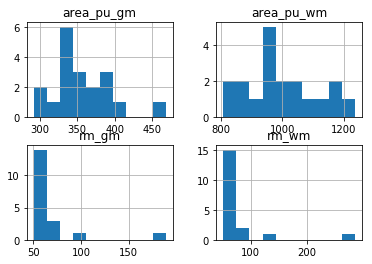

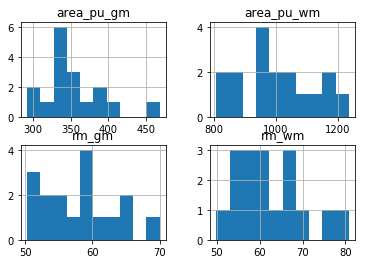

In [15]:
# Select subset of data for analysis

columns = ['group', 'id', 'rm_gm','area_pu_gm','area_pu_wm','rm_wm']

selection = {}
selection['contrast'] = 'T2'
selection['segment'] = 'T6'


selected_rows = df[(df['location_estimate'] == selection['segment']) & (df['acquisition'] == selection['contrast'])]

df_selection = selected_rows[columns]
df_selection.hist();

# check for outliers, missing values etc.
def outlier_check():
    print('Any NaNs? ', df_selection.isnull().values.any())
    # df_selection.info()
    print(df_selection.describe())
    df_selection.hist();
    return




# outlier removal:
# all rows that are larger than x Standard Deviations (SD_cutoff) from mean in any of the tested columns are removed.

testcols = ['rm_gm', 'rm_wm']
maskdf = pd.DataFrame()
SD_cutoff = 2
for c in testcols:
    # df_selection shrinks with each iteration.
    s = ((df_selection[c] - df_selection[c].mean()) / df_selection[c].std()).abs() < SD_cutoff
    
    df_selection = df_selection[s]
    outlier_id = s[s == False]
    print(f"parameter: {c} \n {df.loc[outlier_id.index, 'comments']}")

          
outlier_check
df_selection.hist();
df_selection     

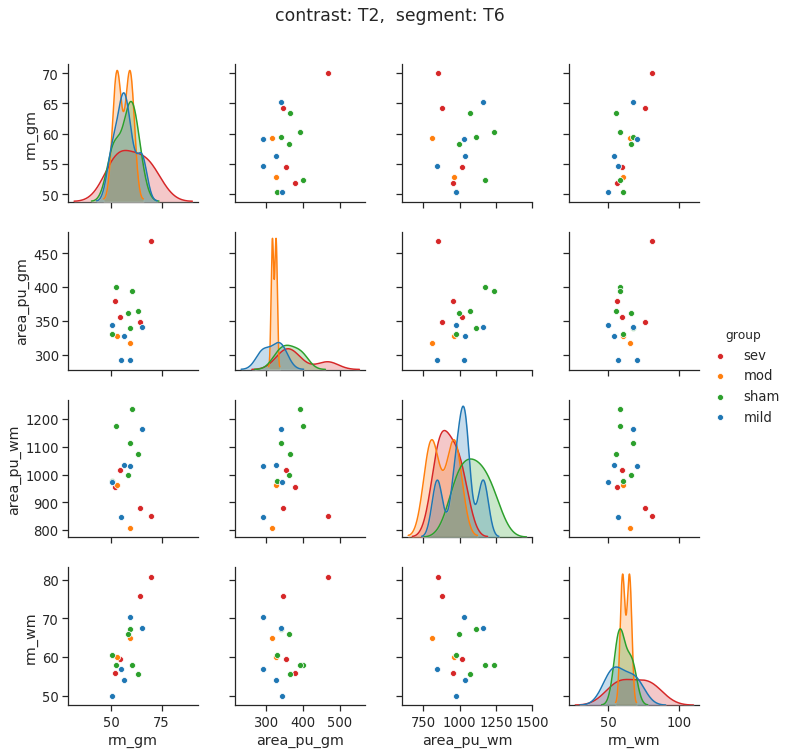

In [16]:
import seaborn as sns


def pairplot_singleDF(df_selection, selection):
    # sns.palplot(sns.color_palette())  # visualize the current palette
    defpal = sns.color_palette()
    newPal = dict(sham = defpal[2], mild = defpal[0], mod = defpal[1], sev = defpal[3])


    df_plot = df_selection.drop(['id'], axis=1)

    # optional code to demean data columns:
    # df_plot = df_selection.drop(['id','group'], axis=1)
    # df_plot = df_plot - df_plot.mean() 
    # df_plot['group'] = df_selection['group']

    sns.set(style="ticks", font_scale=1.2)
    # ax = sns.pairplot(df_plot, hue="group", kind="reg")
    ax = sns.pairplot(df_plot, hue="group", palette=newPal)
    ax.fig.suptitle(f"contrast: {selection['contrast']},  segment: {selection['segment']}", y=1.05);
                    
                    
pairplot_singleDF(df_selection, selection)  # TODO: make widget to select contrast and segments                 

In [32]:
# statsmodels doesnt work for this kind of data... see mord or sklearn...
# https://stackoverflow.com/questions/38549756/how-can-i-do-ordinal-regression-using-the-mord-module-in-python

import statsmodels.api as sm
from patsy import dmatrices


# df_selection = df_selection.dropna()

y, X = dmatrices("group ~ rm_gm + area_pu_gm + area_pu_wm + rm_wm", data=df_selection, NA_action='drop', return_type='dataframe')


mod = sm.OLS(y, X) # Describe model

res = mod.fit()  # Fit model

print(res.summary())  #Summarize model

/home/felix/miniconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


ValueError: shapes (16,4) and (16,4) not aligned: 4 (dim 1) != 16 (dim 0)